Econ 202A Macroeconomics \
Fall 2021 \
Jon Steinsson

Problem Set 1 \
October 26, 2021

Steven Zheng \
<steven_zheng@berkeley.edu>

In [1]:
from Settings import *

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


## Parts a and b
The functions `PolyBasis` and `PolyGetCoeff` are in `Code/Settings/poly.py`.

## Part c
Create your main program and in this program create a grid for $x$ and $y$. Do this in several steps. First, create separate grids for $x$ and separately for $y$. Then, take a Cartesian product of the two. Use 5 grid points for each dimension. Have the range of the grid be $[0.1,2.0]$ for each dimension and have the grid points be evenly spaced.

In [2]:
grid = np.linspace(start=0.1,
                   stop=2.0,
                   num=5)
grid = pd.DataFrame(list(itertools.product(grid,grid)))
grid.columns=['X','Y']

In [3]:
grid

,X,Y
0,0.100,0.100
1,0.100,0.575
2,0.100,1.050
3,0.100,1.525
4,0.100,2.000
5,0.575,0.100
6,0.575,0.575
7,0.575,1.050
8,0.575,1.525
9,0.575,2.000


## Part d
Calculate the true values of the function $\log(x+y)$ on the grid you created in part c -- i.e., for each point on that grid -- and place the results in a vector $Z$.

In [4]:
grid['Z'] = grid.apply(lambda df:
                       logxy(X=df['X'],
                             Y=df['Y']),
                       axis=1)

In [5]:
grid

,X,Y,Z
0,0.100,0.100,-1.609438
1,0.100,0.575,-0.393043
2,0.100,1.050,0.139762
3,0.100,1.525,0.485508
4,0.100,2.000,0.741937
5,0.575,0.100,-0.393043
6,0.575,0.575,0.139762
7,0.575,1.050,0.485508
8,0.575,1.525,0.741937
9,0.575,2.000,0.945850


## Part e
Use your `PolyGetCoeff` function to calculate the basis coefficients $b$ for your polynomial approximation of $\log(x+y)$.

In [6]:
b=PolyGetCoef(X=grid['X'],
              Y=grid['Y'],
              Z=grid['Z'])

In [7]:
print(b)

[-1.4800282   1.54811231  1.54811231 -0.23408421 -0.4128586  -0.23408421]


## Part f
Create a new "evaluation" grid for $x$ and $y$. Follow the same steps as when you created the earlier grid, except that this time have 49 points for each dimension. Have these points be evenly spaced, but on a slightly bigger range $[0.1,2.5]$.

In [8]:
grid_eval = np.linspace(start=0.1,
                        stop=2.5,
                        num=49)
grid_eval = pd.DataFrame(list(itertools.product(grid_eval,grid_eval)))
grid_eval.columns=['X','Y']

In [9]:
grid_eval

,X,Y
0,0.1,0.10
1,0.1,0.15
2,0.1,0.20
3,0.1,0.25
4,0.1,0.30
...,...,...
2396,2.5,2.30
2397,2.5,2.35
2398,2.5,2.40
2399,2.5,2.45


## Part g
Calculate the true value of the function $\log(x+y)$ on the evaluation grid and place the results ina vector `Zeval_true`. Use the basis coefficients $b$ from part e and the `PolyBasis` function to calculate your polynomial approximation of the function $\log(x+y)$ on the evaluation grid and place the results in a vector `Zeval_approx`.

In [10]:
grid_eval['Zeval_true'] = grid_eval.apply(lambda df:
                                          logxy(X=df['X'],
                                                Y=df['Y']),
                                          axis=1)

In [11]:
grid_eval['Zeval_approx'] = PolyApprox(X=grid_eval['X'],
                                       Y=grid_eval['Y'],
                                       b=b)

In [12]:
grid_eval.head()

,X,Y,Zeval_true,Zeval_approx
0,0.1,0.10,-1.609438,-1.179216
1,0.1,0.15,-1.386294,-1.106801
2,0.1,0.20,-1.203973,-1.035556
3,0.1,0.25,-1.049822,-0.965481
4,0.1,0.30,-0.916291,-0.896577


## Part h
Plot `Zeval_true` and `Zeval_approx`.

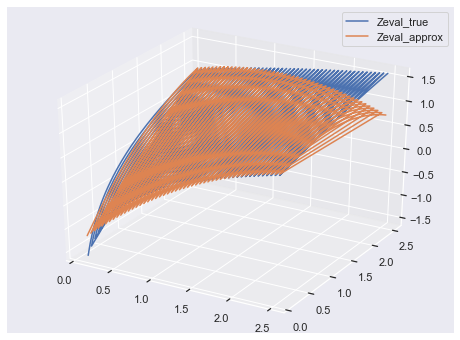

In [13]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot3D(xs=grid_eval['X'],
          ys=grid_eval['Y'],
          zs=grid_eval['Zeval_true'],
          label='Zeval_true')
ax.plot3D(xs=grid_eval['X'],
          ys=grid_eval['Y'],
          zs=grid_eval['Zeval_approx'],
          label='Zeval_approx')
ax.legend()


## Part i
Calculate the maximum absolute value of the difference between the function (i.e., `Zeval_true`) and your approximation of the function (i.e., `Zeval_approx`). Do this both for the range $[0.1,2.0]$ (i.e., the range of interpolation), and also for the full range including the part of the range where you are extrapolating (i.e., where you are beyond the range of points used teo calculate the basis coefficients $b$).

Over the smaller grid:

In [ ]:
grid['Zeval_approx'] = PolyApprox(X=grid['X'],
                                  Y=grid['Y'],
                                  b=b)

In [ ]:
grid['Zeval_diff'] = grid['Z'].copy() -\
                     grid['Zeval_approx'].copy()

In [ ]:
grid['Zeval_diff'].abs().max()

0.43022190265903437

And over the larger grid

In [ ]:
grid_eval['Zeval_diff'].abs().max()

0.8553234464520665

## Part j
Plot the difference between `Zeval_true` and `Zeval_approx`

In [14]:
grid_eval['Zeval_diff'] = grid_eval['Zeval_true'].copy() -\
                          grid_eval['Zeval_approx'].copy()

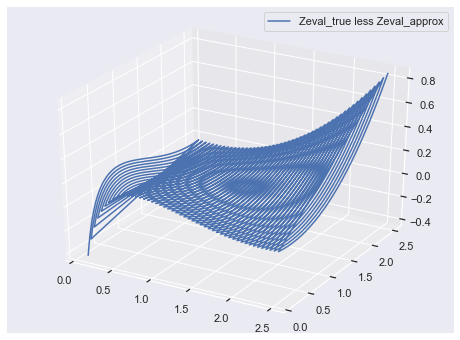

In [15]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot3D(xs=grid_eval['X'],
          ys=grid_eval['Y'],
          zs=grid_eval['Zeval_diff'],
          label='Zeval_true less Zeval_approx')
ax.legend()


## Part k
Repeat this approximation exercise -- i.e., parts c through j -- with 15 and 35 points on each dimension of the grid used to calculate $b$. Plot these approximations together on the same figure.

In [16]:
grid15 = np.linspace(start=0.1,
                     stop=2.0,
                     num=15)
grid15 = pd.DataFrame(list(itertools.product(grid15,grid15)))
grid15.columns=['X','Y']

grid15['Z'] = grid15.apply(lambda df:
                           logxy(X=df['X'],
                                 Y=df['Y']),
                           axis=1)

b15=PolyGetCoef(X=grid15['X'],
                Y=grid15['Y'],
                Z=grid15
                ['Z'])

In [17]:
print(b15)

[-1.22246681  1.32748147  1.32748147 -0.18847477 -0.34492874 -0.18847477]


In [47]:
grid15.head()

,X,Y,Z,Zeval_approx
0,0.1,0.100000,-1.609438,-0.964189
1,0.1,0.235714,-1.091495,-0.797299
2,0.1,0.371429,-0.751988,-0.637352
3,0.1,0.507143,-0.498991,-0.484348
4,0.1,0.642857,-0.297252,-0.338287


In [46]:
grid15['Zeval_approx'] = PolyApprox(X=grid15['X'],
                                    Y=grid15['Y'],
                                    b=b15)

Over the smaller grid:

In [ ]:
grid['Zeval_approx'] = PolyApprox(X=grid['X'],
                                  Y=grid['Y'],
                                  b=b)

In [ ]:
grid['Zeval_diff'] = grid['Z'].copy() -\
                     grid['Zeval_approx'].copy()

In [ ]:
grid['Zeval_diff'].abs().max()

0.43022190265903437

And over the larger grid

In [ ]:
grid_eval['Zeval_diff'].abs().max()

0.8553234464520665

In [18]:
grid35 = np.linspace(start=0.1,
                     stop=2.0,
                     num=35)
grid35 = pd.DataFrame(list(itertools.product(grid35,grid35)))
grid35.columns=['X','Y']

grid35['Z'] = grid35.apply(lambda df:
                           logxy(X=df['X'],
                                 Y=df['Y']),
                           axis=1)

b35=PolyGetCoef(X=grid35['X'],
                Y=grid35['Y'],
                Z=grid35
                ['Z'])

In [19]:
print(b35)

[-1.16519396  1.27830536  1.27830536 -0.17805525 -0.32938877 -0.17805525]


In [20]:
grid_eval['Zeval_approx_15'] = PolyApprox(X=grid_eval['X'],
                                          Y=grid_eval['Y'],
                                          b=b15)

grid_eval['Zeval_approx_35'] = PolyApprox(X=grid_eval['X'],
                                          Y=grid_eval['Y'],
                                          b=b35)                                          

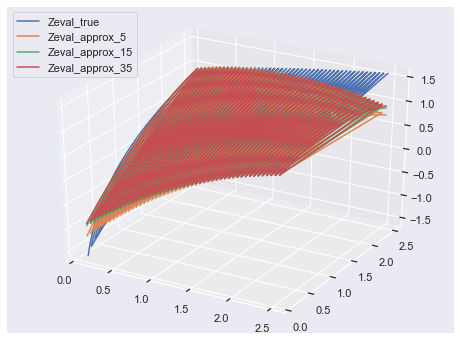

In [21]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot3D(xs=grid_eval['X'],
          ys=grid_eval['Y'],
          zs=grid_eval['Zeval_true'],
          label='Zeval_true')
ax.plot3D(xs=grid_eval['X'],
          ys=grid_eval['Y'],
          zs=grid_eval['Zeval_approx'],
          label='Zeval_approx_5')
ax.plot3D(xs=grid_eval['X'],
          ys=grid_eval['Y'],
          zs=grid_eval['Zeval_approx_15'],
          label='Zeval_approx_15')
ax.plot3D(xs=grid_eval['X'],
          ys=grid_eval['Y'],
          zs=grid_eval['Zeval_approx_35'],
          label='Zeval_approx_35')          
ax.legend()


In [22]:
grid_eval['Zeval_diff_15'] = grid_eval['Zeval_true'].copy() -\
                             grid_eval['Zeval_approx_15'].copy()

grid_eval['Zeval_diff_35'] = grid_eval['Zeval_true'].copy() -\
                             grid_eval['Zeval_approx_35'].copy()

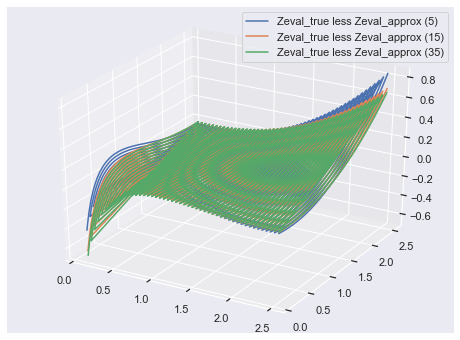

In [23]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot3D(xs=grid_eval['X'],
          ys=grid_eval['Y'],
          zs=grid_eval['Zeval_diff'],
          label='Zeval_true less Zeval_approx (5)')

ax.plot3D(xs=grid_eval['X'],
          ys=grid_eval['Y'],
          zs=grid_eval['Zeval_diff_15'],
          label='Zeval_true less Zeval_approx (15)')

ax.plot3D(xs=grid_eval['X'],
          ys=grid_eval['Y'],
          zs=grid_eval['Zeval_diff_35'],
          label='Zeval_true less Zeval_approx (35)')

ax.legend()


Here's the max absolute difference, all over the full evauation grid


In [24]:
e_5 = grid_eval[['Zeval_true','Zeval_approx']]\
               .diff(axis=1)\
               .abs()\
               .max()\
               .values[1]

e_15 = grid_eval[['Zeval_true','Zeval_approx_15']]\
                .diff(axis=1)\
                .abs()\
                .max()\
                .values[1]
                
e_35 = grid_eval[['Zeval_true','Zeval_approx_35']]\
                .diff(axis=1)\
                .abs()\
                .max()\
                .values[1]

In [25]:
e = pd.DataFrame.from_dict({'Number of grid points for b':[5,15,35],
                            'Max absolute value of difference':[e_5,e_15,e_35]})

In [26]:
e

,Number of grid points for b,Max absolute value of difference
0,5,0.855323
1,15,0.706237
2,35,0.693050


## Part l
Discuss what you have learned about the quality of polynomial approximations

Looks like the quality of polynomial approximations have the potential to be quite good, and the quality increases with number of grid points and higher order polynomials used.

## Part m
In the other notebook called `hw1_m.ipynb`.

In [27]:
grid

,X,Y,Z
0,0.100,0.100,-1.609438
1,0.100,0.575,-0.393043
2,0.100,1.050,0.139762
3,0.100,1.525,0.485508
4,0.100,2.000,0.741937
5,0.575,0.100,-0.393043
6,0.575,0.575,0.139762
7,0.575,1.050,0.485508
8,0.575,1.525,0.741937
9,0.575,2.000,0.945850


In [28]:
B = PolyBasis(X=grid['X'],
              Y=grid['Y'])
Z = grid['Z'].copy()

In [29]:
reg = sm.OLS(endog=Z,
             exog=B)\
        .fit()

In [30]:
reg.params.values

array([-1.4800282 ,  1.54811231,  1.54811231, -0.23408421, -0.4128586 ,
       -0.23408421])

In [31]:
BT = B.T
b = ((np.linalg.inv((BT @ B)) @ BT) @ Z)

In [32]:
b

array([-1.4800282 ,  1.54811231,  1.54811231, -0.23408421, -0.4128586 ,
       -0.23408421])

In [33]:
np.dot(B,b)

array([-1.17921601, -0.5385267 , -0.00346789,  0.42596043,  0.74975824,
       -0.5385267 ,  0.00901139,  0.45091898,  0.78719608,  1.01784267,
       -0.00346789,  0.45091898,  0.79967535,  1.04280122,  1.18029659,
        0.42596043,  0.78719608,  1.04280122,  1.19277587,  1.23712002,
        0.74975824,  1.01784267,  1.18029659,  1.23712002,  1.18831295])

In [34]:
B.shape

(25, 6)

In [35]:
b.shape

(6,)

In [37]:
grid.shape

(25, 3)